## Simulation: Drop needles

Suppose we have a floor made of parallel strips of wood, each the same width $t$, and we drop a needle with length $l=t$ onto the floor. What is the probability that the needle will lie across a line between two strips?

Below is an example of two needles dropped. Needle a falls across a line, while needle b does not.

![Example](needle.png)

In this coding homework, we will simulate such experiments and connect them with the estimation of $\pi$.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

The first thing to write is a function *drop_needle*. It simulates dropping a needle onto the floor we described and returns whether the needle lies across a line between two strips. 

Now the question is how to describe the position of a needle using random variables. The figure below visualizes a needle sampled, with $t=l=1$ (see figure above). Remember that the needle should have an equal probability of landing in any position. In fact, we can uniformly sample the position of the needle's mass center and then uniformly sample the angle formed by the needle and the x-axis. Specifically, we only focus on the mass center's position with respect to (w.r.t.) the x-axis since we can assume the strip is long enough.

Besides, we do not need to sample the x-value of the center from $-\inf$ to $\inf$. Instead, we can uniformly sample it from $0$ to $t$. Why is this the case?

    Because we uniformly sample the position of the needle's mass center. So the probability of droping to one location should be the same anywhere.

![needleExmple2](needleExmple2.png)

[10pts]

In [3]:
import pandas as pd 

In [4]:

def drop_needle(strip_length, needle_length):
    """
    Simulate dropping a needle on to the floor made of parallel strips of woods.
    Return whether the needle lie across a line between two strips.

    :return: An Integer that equals to 1 if the needle lie across a line, and 0 otherwise.
    """ 
    
    # write your code here
    t = strip_length
    l = needle_length
    mc = np.random.uniform(0,t)
    rad = np.random.uniform(0,np.pi)
    len = l*math.cos(rad)/2
    x = mc+ abs(len)
    y = mc -abs(len)
    # so x always greater or equal to y
    # print("mc: ", mc, " len: ", len)
    if (x>=0 and y< 0) or (x>=t and y<t):
        return 1
    else:
        return 0
    

Next, write a function run_simulation that calls drop_needle repetitively for n times. The function should return the probability that a dropped needle lies across a line based on the n trials. [5pts]

In [5]:
def run_simulation(n, strip_length, needle_length):
    """
    Repeat drop_needle experiment for n times. Return the probability that the needle will lie across a line. 

    :return: float, the probability that the needle will lie across a line according to the n experiments.
    """ 
    # Write your code here
    trials = np.array([])
    for _ in range(n):
        trials = np.append(trials, drop_needle(strip_length, needle_length))
    # print(trials.size)
    return trials.mean()
    

In [23]:
5000*run_simulation(5000, 1, 1)

3175.0

### Run the simulation

Run the *run_simulation* function 500 times with parameters n=1000, strip_length=1, and needle_length=1. Each time the function is going to return a probability of the needle lying across the line. Plot a histogram of those 500 probabilities. [5pts]

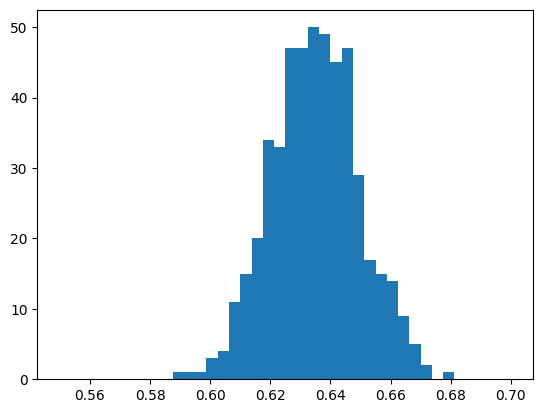

In [6]:
# Write your code here
vals = np.array([])
for _ in range(500):
    vals = np.append(vals, run_simulation(1000,1,1))
plt.hist(vals, range=(0.55,0.7), bins=40)
plt.show()

## Estimate $\pi$ based on the returned probability

This experiment can be used to estimate the value of $\pi$. In the case where the needle length $l$ equals to the width $t$ of the strips, the probability of a needle lies across a line is $p=\frac{2}{\pi}$. Try to prove why this holds. [15pts]


Your proof: 



Assume the mc stands for mass center position and its range is from 0 to t. The needle cross the line when $\frac{l\cos{\theta}}{2} \geq t-mc$ and $t-\frac{l\cos{\theta}}{2}\leq mc \leq t$. So, we have 
$$0 \leq t-mc \leq \frac{l\cos{\theta}}{2} \text{ and } t-\frac{l\cos{\theta}}{2}\leq mc \leq t$$
Also, since $mc \sim Uniform$ :
$Pr(mc) = \frac{1}{t}$ and so $Pr(t - mc) = \frac{1}{t}$. Assume event A is when mc fall into the above range. As the second range has the same probability as the first one, $Pr(A) = 2Pr(t - mc) = \frac{2}{t}$.

Due to this, to ensure $\cos{\theta}$ is positive, the range of $\theta$ should be $0 \leq \theta \leq \frac{\pi}{2}$, and since $\theta \sim Uniform$
$$Pr(\theta) = \frac{1}{\frac{\pi}{2}} = \frac{2}{\pi}$$ 

As $Pr(\theta)$ and $Pr(mc)$ are independent from each other, the joint probability density function for $\theta$ and $mc$ is:
$$ f(\theta , A)  = \frac{2}{t} \cdot \frac{2}{\pi} = \frac{4}{t \pi} $$

$$ \int_{0}^{\frac{\pi}{2}} \int_{0}^{\frac{l\cos{\theta}}{2}} \frac{4}{t \pi} \; d(t-mc) d\theta = \int_{0}^{\frac{\pi}{2}} \frac{4}{t \pi} \cdot \frac{l\cos{\theta}}{2} d\theta = \int_{0}^{\frac{\pi}{2}} \frac{2l\cos{\theta}}{t \pi}d\theta = \frac{2}{\pi}$$

Since


Assume you know $p=\frac{2}{\pi}$, and you can call the function *run_simulation*. Let $X_i$ be the indicator random variable of dropping the $i$-th needle, i.e., $X_i=1$ if the $i$-th needle lies across a line, and $X_i=0$ otherwise. Let $S_n=\sum_{i=1}^n X_i$. How many needles do you need to drop, i.e., what value of $n$ should you take, to get the 95\% confidence interval of $S_n$? Use Chebyshev's inequality and let $\epsilon=0.1$. [15pts]

Your answer: 

Since $Var(S_n) = \sum_{i=1}^n Var(X_i) + 2 \sum_{i\lt j} Cov(X_i,X_j)$, $Var(X_i) = p(1-p)$ and as covariance of two independent random variables is 0, we get:
$$Var(S_n) = n \cdot \frac{2}{\pi} (1-\frac{2}{\pi})$$

According to WLLN's proof using Chebyshev’s inequality
$$Pr(\lvert \frac{S_n}{n} - \mu \rvert \gt \epsilon) \leq Pr(\lvert S_n - n\mu \rvert \gt \epsilon n) \leq  \frac{Var(S_n)}{\epsilon^2 n^2} \leq \delta$$
Since we want to get $95\% $ confidence level, $1 - \delta = .95$, so $\delta = 0.5$
$$\frac{Var(S_n)}{\epsilon^2 n^2} = \frac{n \cdot \frac{2}{\pi} (1-\frac{2}{\pi})}{n^2 \epsilon ^2} = \frac{2 \pi -4}{\pi ^2 \cdot n \cdot (0.1)^2} \leq 0.5$$

    And we get n = 463

What does the CLT say about $S_n$? Run the *run_simulation* function with parameters n=5000, strip_length=1, and needle_length=1, and report a 95\% confidence interval of $S_n$ based on CLT (see lecture slides page 4 from Feb 2). [10pts] 

The $S_n = \sum_{i = 1}^n{X_i}$ which means is the summation of all possible cases

In [32]:
# Write your code here.
mean = 5000*(2/math.pi)
x = 5000*run_simulation(5000,1,1)
std = math.sqrt((2/math.pi)*(1-(2/(math.pi)))*5000)
ste = std
end = mean+2*ste
start = mean-2*ste
print(start,"<= X_N <=", end)

3115.0790062370265 <= X_N <= 3251.1187174387874
